In [1]:
import pandas as pd
df=pd.read_csv('d:/data/soccer/player.csv')
df.head()

,id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
0,1,Aaron Appindangoye,1992-02-29,right,27,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
1,2,Aaron Cresswell,1989-12-15,right,30,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,3,Aaron Doran,1991-05-13,right,28,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
3,4,Aaron Galindo,1982-05-08,right,37,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
4,5,Aaron Hughes,1979-11-08,right,40,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0


In [2]:
train_cols=df.columns[4:43] #4~42
X=df[train_cols] #독립변수
y=df['Label'] #종속변수
X.head()

,age,height,weight,potential,right_foot,left_foot,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,27,183,187,71,1,0,49,44,71,61,...,54,48,65,69,69,6,11,10,8,8
1,30,170,146,71,1,0,49,44,71,61,...,54,48,65,69,69,6,11,10,8,8
2,28,170,163,66,1,0,49,44,71,61,...,54,48,65,66,69,6,11,10,8,8
3,37,183,198,65,1,0,48,43,70,60,...,53,47,62,63,66,5,10,9,7,7
4,40,183,154,65,1,0,48,43,70,60,...,53,47,62,63,66,5,10,9,7,7


In [3]:
df['Label'].value_counts() #샘플링 전의 0,1 분포

1    5705
0    5230
Name: Label, dtype: int64

In [4]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [5]:
df2['Label'].value_counts()

1    5230
0    5230
Name: Label, dtype: int64

In [6]:
#샘플링 데이터셋에서 X,y 선택
X=df2[train_cols]
y=df2['Label']

In [7]:
print(X.columns) #변수명
print(X.shape) #데이터 차원 -독립변수 39개

Index(['age', 'height', 'weight', 'potential', 'right_foot', 'left_foot',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')
(10460, 39)


In [8]:
import statsmodels.api as sm
model=sm.Logit(y,X) #로지스틱 회귀분석
result=model.fit()
result.summary2()
# 모형의 설명력 : 23.7%
# 유의하지 않은 변수들:
# 상관계수(Coef)

Optimization terminated successfully.
         Current function value: 0.237662
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.657    
Dependent Variable:   Label              AIC:                5049.8884
Date:                 2020-03-17 14:18   BIC:                5332.8457
No. Observations:     10460              Log-Likelihood:     -2485.9  
Df Model:             38                 LL-Null:            -7250.3  
Df Residuals:         10421              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
age                 -0.0020   0.0068  -0.2898 0.7720  -0.0152   0.0113
height              -0.0060   0.0089  -0.6703 0.5027  -0.0234   0.0114
weight               0.0043   0.0038   1.1384 0.2549  -0.0031   0.0117
potential            0.2900   0.0099  29.1836 0.0000   0.2705   0.3094
right_foot         -53.8962   1.7343 -31.0773 0.0000 -57.2953 -50.4971
left_foot          -54.1440   1.7405 -31.1088 0.0000 -57.5553 -50.7328
crossing             0.0110   0.0048   2.2781 0.0227   0.0015   0.0205
finishing            0.0135   0.0053   2.5401 0.0111   0.0031   0.0240
heading_accuracy     0.0597   0.0048  12.3627 0.0000   0.0502   0.0691
short_passing        0.0208   0.0084   2.4831 0.0130   0.0044   0.0372
volleys             -0.0127   0.0048  -2.6613 0.0078  -0.0221  -0.0034
dribbling            0.0027   0.0074   0.3674 0.7133  -0.0117   0.0171
curve                0.0203   0.0045   4.5336 0.0000   0.0115   0.0290
free_kick_accuracy   0.0273   0.0043   6.3208 0.0000   0.0189   0.0358
long_passing         0.0125   0.0054   2.3125 0.0207   0.0019   0.0231
ball_control         0.1038   0.0096  10.7614 0.0000   0.0849   0.1227
acceleration        -0.0420   0.0083  -5.0622 0.0000  -0.0582  -0.0257
sprint_speed         0.0453   0.0074   6.1242 0.0000   0.0308   0.0599
agility             -0.0044   0.0061  -0.7145 0.4749  -0.0164   0.0077
reactions            0.1702   0.0073  23.3670 0.0000   0.1559   0.1845
balance              0.0014   0.0050   0.2882 0.7732  -0.0083   0.0112
shot_power           0.0271   0.0049   5.4999 0.0000   0.0174   0.0367
jumping              0.0168   0.0041   4.1111 0.0000   0.0088   0.0248
stamina             -0.0165   0.0046  -3.5588 0.0004  -0.0255  -0.0074
strength             0.0296   0.0050   5.8810 0.0000   0.0197   0.0394
long_shots          -0.0338   0.0051  -6.5656 0.0000  -0.0439  -0.0237
aggression           0.0266   0.0040   6.7125 0.0000   0.0188   0.0344
interceptions        0.0097   0.0047   2.0696 0.0385   0.0005   0.0190
positioning         -0.0179   0.0048  -3.7171 0.0002  -0.0274  -0.0085
vision               0.0175   0.0054   3.2403 0.0012   0.0069   0.0281
penalties            0.0003   0.0044   0.0659 0.9474  -0.0083   0.0088
marking              0.0308   0.0065   4.7062 0.0000   0.0180   0.0436
standing_tackle      0.0006   0.0073   0.0770 0.9387  -0.0137   0.0148
sliding_tackle      -0.0348   0.0065  -5.3552 0.0000  -0.0476  -0.0221
gk_diving            0.1015   0.0092  10.9819 0.0000   0.0834   0.1197
gk_handling          0.0352   0.0109   3.2392 0.0012   0.0139   0.0565
gk_kicking          -0.0248   0.0040  -6.1864 0.0000  -0.0327  -0.0170
gk_positioning       0.0887   0.0121   7.3267 0.0000   0.0649   0.1124
gk_reflexes         -0.0206   0.0104  -1.9692 0.0489  -0.0410  -0.0001
======================================================================

"""

In [9]:
#penalties, standing_tackle, balance, dribbling, agw 제외 모형
#최종적으로 선택한 변수들
X=df2[['height', 'weight', 'potential', 'right_foot', 'left_foot',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision','marking','sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']]
y=df2['Label']
model=sm.Logit(y,X) #로지스틱 회귀분석
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.237676
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.657    
Dependent Variable:   Label              AIC:                5040.1872
Date:                 2020-03-17 14:18   BIC:                5286.8679
No. Observations:     10460              Log-Likelihood:     -2486.1  
Df Model:             33                 LL-Null:            -7250.3  
Df Residuals:         10426              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
height              -0.0057   0.0088  -0.6432 0.5201  -0.0229   0.0116
weight               0.0041   0.0037   1.1159 0.2645  -0.0031   0.0114
potential            0.2898   0.0099  29.3068 0.0000   0.2704   0.3092
right_foot         -53.9261   1.7026 -31.6730 0.0000 -57.2632 -50.5891
left_foot          -54.1740   1.7085 -31.7088 0.0000 -57.5226 -50.8255
crossing             0.0113   0.0047   2.4166 0.0157   0.0021   0.0204
finishing            0.0138   0.0052   2.6538 0.0080   0.0036   0.0240
heading_accuracy     0.0595   0.0048  12.4732 0.0000   0.0502   0.0689
short_passing        0.0213   0.0083   2.5551 0.0106   0.0050   0.0376
volleys             -0.0126   0.0048  -2.6439 0.0082  -0.0219  -0.0033
curve                0.0205   0.0044   4.6048 0.0000   0.0118   0.0292
free_kick_accuracy   0.0273   0.0042   6.5658 0.0000   0.0192   0.0355
long_passing         0.0126   0.0054   2.3281 0.0199   0.0020   0.0231
ball_control         0.1051   0.0089  11.8592 0.0000   0.0877   0.1225
acceleration        -0.0411   0.0080  -5.1352 0.0000  -0.0568  -0.0254
sprint_speed         0.0452   0.0074   6.1272 0.0000   0.0307   0.0596
agility             -0.0036   0.0058  -0.6251 0.5319  -0.0150   0.0078
reactions            0.1700   0.0073  23.4143 0.0000   0.1558   0.1842
shot_power           0.0271   0.0049   5.5185 0.0000   0.0175   0.0367
jumping              0.0169   0.0040   4.2772 0.0000   0.0092   0.0247
stamina             -0.0167   0.0046  -3.6392 0.0003  -0.0256  -0.0077
strength             0.0292   0.0049   5.9882 0.0000   0.0196   0.0387
long_shots          -0.0337   0.0051  -6.5789 0.0000  -0.0438  -0.0237
aggression           0.0267   0.0039   6.8183 0.0000   0.0190   0.0344
interceptions        0.0099   0.0046   2.1653 0.0304   0.0009   0.0188
positioning         -0.0176   0.0047  -3.7581 0.0002  -0.0268  -0.0084
vision               0.0176   0.0053   3.2978 0.0010   0.0071   0.0281
marking              0.0310   0.0059   5.2509 0.0000   0.0194   0.0426
sliding_tackle      -0.0347   0.0057  -6.0414 0.0000  -0.0459  -0.0234
gk_diving            0.1010   0.0092  10.9998 0.0000   0.0830   0.1191
gk_handling          0.0351   0.0108   3.2456 0.0012   0.0139   0.0563
gk_kicking          -0.0251   0.0039  -6.3848 0.0000  -0.0328  -0.0174
gk_positioning       0.0889   0.0121   7.3606 0.0000   0.0652   0.1126
gk_reflexes         -0.0202   0.0104  -1.9451 0.0518  -0.0407   0.0002
======================================================================

"""

In [10]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [11]:
#로지스틱 회귀분석 모형
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(random_state=10, max_iter=5000)
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#예측정확도
print(logit.score(X_train,y_train))
print(logit.score(X_test,y_test))

0.8983030592734226
0.8891013384321224


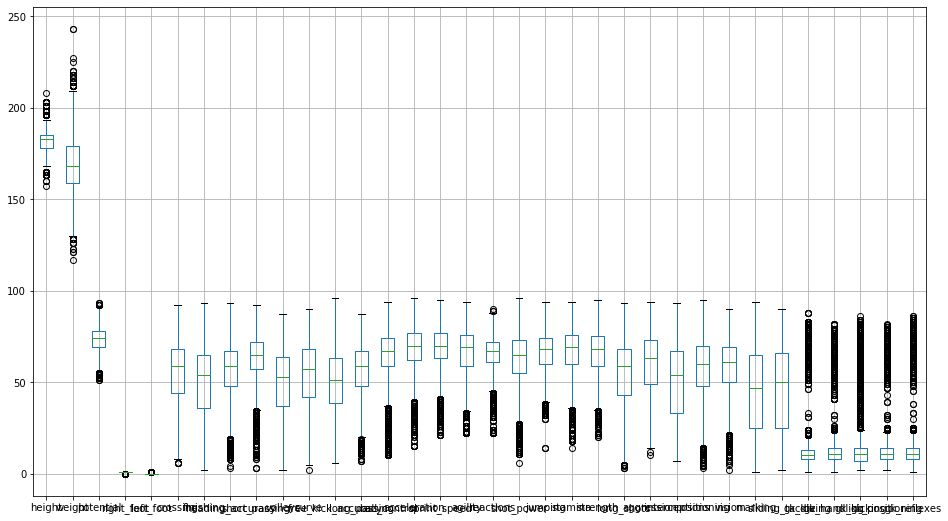

In [13]:
#표주화 전의 박스플롯
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,9) #가로,세로 사이즈 설정
X.boxplot()

In [14]:
#데이터 표준화: 평균0, 표준편차 1로 설정
mean_on_train=X_train.mean(axis=0) #변수들의 평균값
std_on_train=X_train.std(axis=0) #변수들의 표준편차
#print(mean_on_train)
#print(std_on_train)
#(측정값-평균)/표준편차
X_train_scaled=(X_train - mean_on_train)/std_on_train
X_test_scaled=(X_test - mean_on_train)/std_on_train

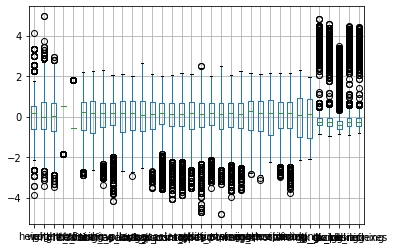

In [15]:
X_train_scaled.boxplot()

In [16]:
#예측률을 저장할 리스트
methods=[]
result_tr=[]
result_te=[]

In [17]:
#표준화된 데이터로 
logit=LogisticRegression(random_state=10, max_iter=5000)
logit.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#예측정확도
score_tr=logit.score(X_train_scaled,y_train)
score_te=logit.score(X_test_scaled,y_test)
print(score_tr)
print(score_te)

0.8978250478011472
0.888623326959847


In [19]:
methods.append('LOGIT')
result_tr.append(score_tr)
result_te.append(score_te)
print(methods)
print(result_tr)
print(result_te)

['LOGIT']
[0.8978250478011472]
[0.888623326959847]


In [22]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=10,max_depth=5)
tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [23]:
#예측정확도
score_tr=tree.score(X_train_scaled,y_train)
score_te=tree.score(X_test_scaled,y_test)
print(score_tr)
print(score_te)

0.9175430210325047
0.9086998087954111


In [24]:
#리스트에 추가
methods.append('Tree')
result_tr.append(score_tr)
result_te.append(score_te)
print(methods)
print(result_tr)
print(result_te)

['LOGIT', 'Tree']
[0.8978250478011472, 0.9175430210325047]
[0.888623326959847, 0.9086998087954111]


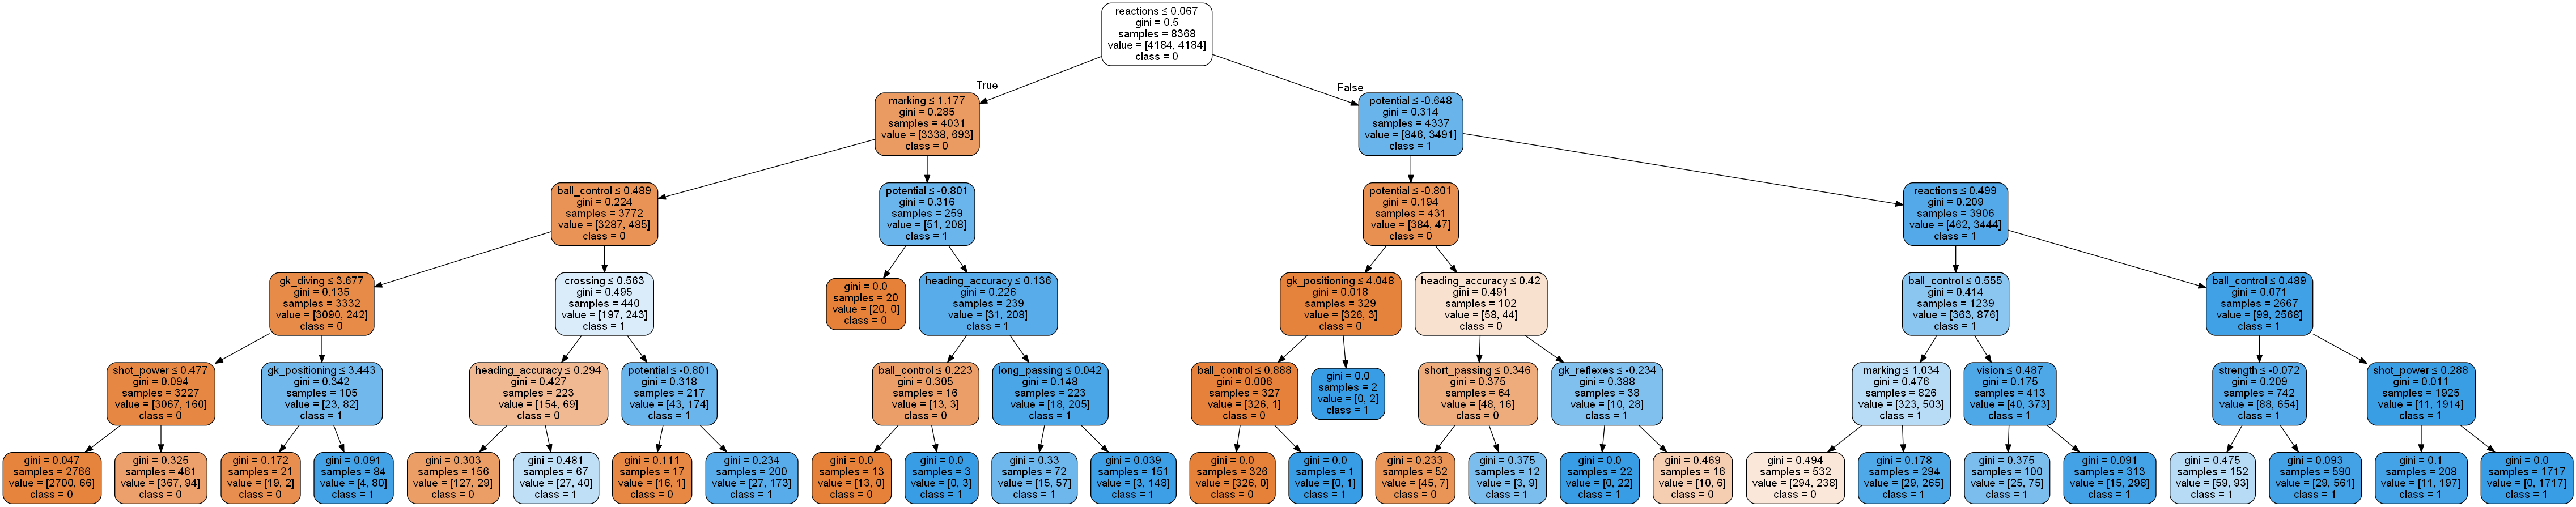

In [25]:
#트리그래프
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
dot_data=export_graphviz(tree,out_file=None,
                         feature_names=X.columns,class_names=['0','1'],filled=True,
                         rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#그래프를 해석, 몇가지 규칙 정리

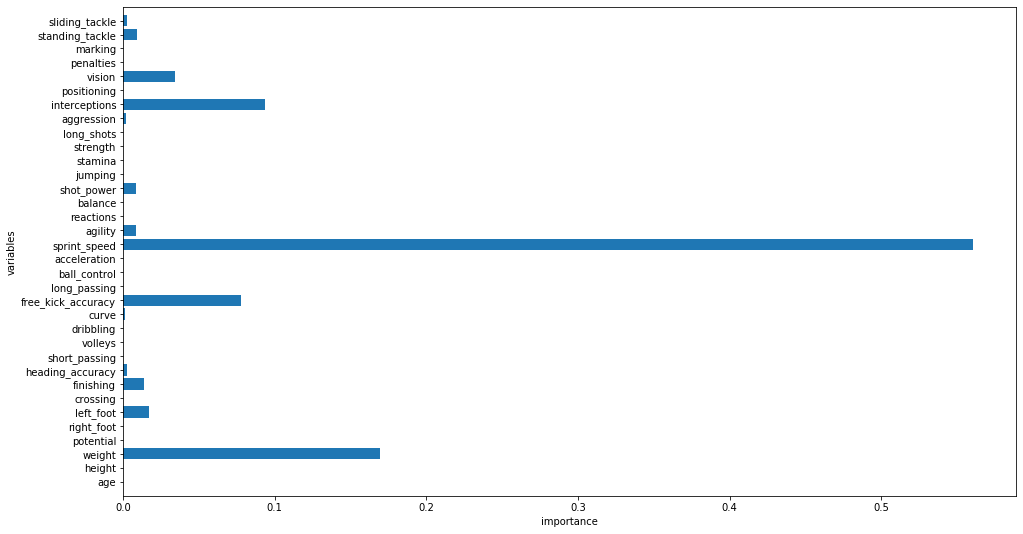

In [26]:
#트리의 특성 중요도 그래프
import numpy as np
import matplotlib.pyplot as plt

def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.rcParams['figure.figsize']=(16,9)
    plt.barh(range(n_features),model.feature_importances_,
            align='center') #수평막대그래프
    #print(model.feature_importances_)
    plt.yticks(np.arange(n_features),train_cols)
    plt.xlabel('importance')
    plt.ylabel('variables')
    plt.ylim(-1,n_features)
    
plot_tree(tree)
#트리를 만드는데 기여도가 높은 변수를 정리

In [27]:
#랜덤포레스트 모형
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=10)
forest.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [28]:
#예측정확도
score_tr=forest.score(X_train_scaled,y_train)
score_te=forest.score(X_test_scaled,y_test)
print(score_tr)
print(score_te)

1.0
0.9799235181644359


In [29]:
#리스트에 추가
methods.append('RF')
result_tr.append(score_tr)
result_te.append(score_te)
print(methods)
print(result_tr)
print(result_te)

['LOGIT', 'Tree', 'RF']
[0.8978250478011472, 0.9175430210325047, 1.0]
[0.888623326959847, 0.9086998087954111, 0.9799235181644359]


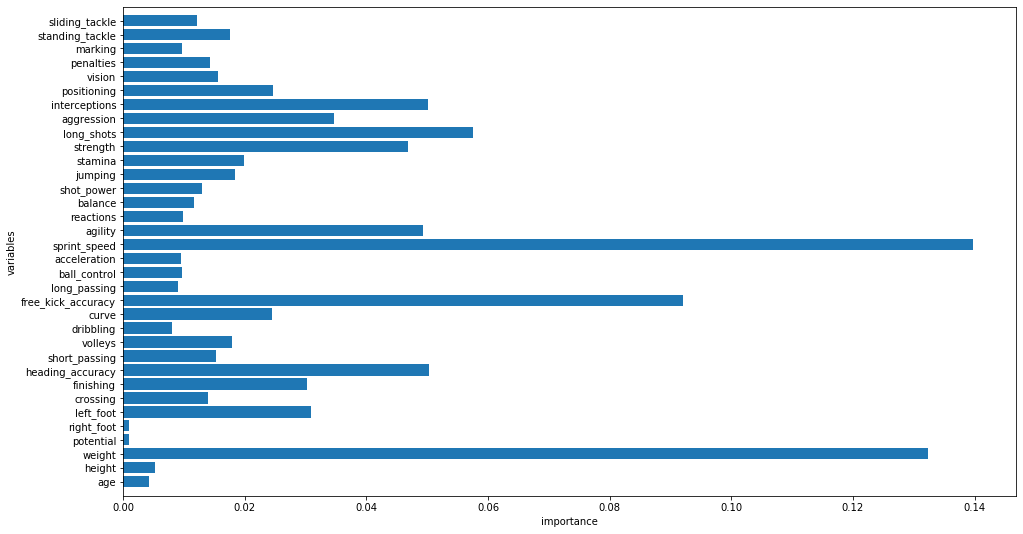

In [30]:
plot_tree(forest)

최적의 k: 3
최적의 정확도: 0.9402485659655831


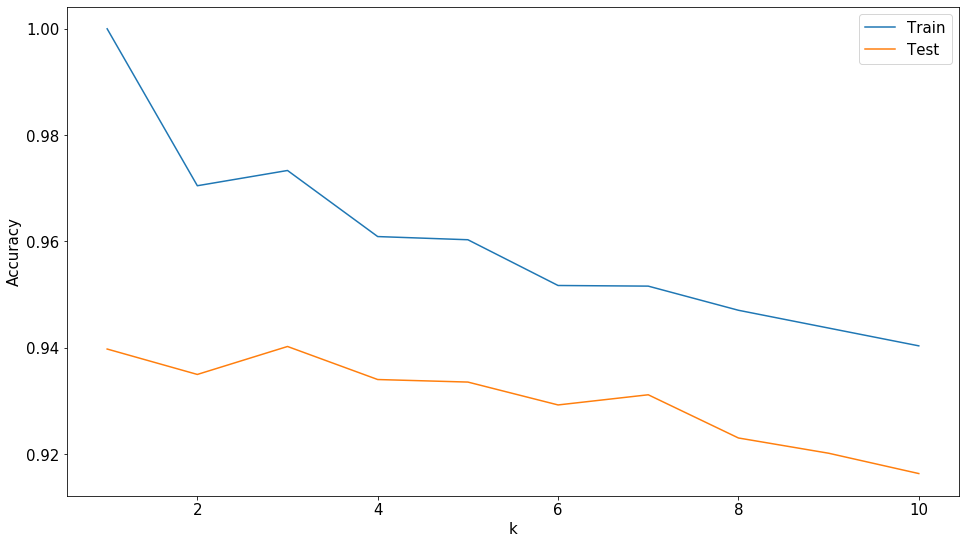

In [31]:
#knn 모형, 최적의 k값을 구하는 과정
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
neighbors=range(1,11) #이웃의 갯수 1~10
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n) #knn 모형
    knn.fit(X_train_scaled, y_train) #학습
    train_rate.append(knn.score(X_train_scaled,y_train))
    test_rate.append(knn.score(X_test_scaled,y_test))
    
test_arr=np.array(test_rate) #리스트를 넘파이배열로 변환
max_rate=np.max(test_arr) #최대값
idx=np.where(test_arr==max_rate)[0][0] #최대값의 인덱스를 구함
print('최적의 k:',neighbors[idx])
print('최적의 정확도:',test_rate[idx])
plt.rcParams['font.size']=15
plt.plot(neighbors,train_rate,label='Train')
plt.plot(neighbors,test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend()

In [32]:
#KNN 모형
knn=KNeighborsClassifier(n_neighbors=1) #KNN 모형
knn.fit(X_train_scaled, y_train) #학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [33]:
score_tr=knn.score(X_train_scaled,y_train)
score_te=knn.score(X_test_scaled,y_test)
print(score_tr)
print(score_te)

1.0
0.9397705544933078


In [34]:
#리스트에 추가
methods.append('KNN')
result_tr.append(score_tr)
result_te.append(score_te)
print(methods)
print(result_tr)
print(result_te)

['LOGIT', 'Tree', 'RF', 'KNN']
[0.8978250478011472, 0.9175430210325047, 1.0, 1.0]
[0.888623326959847, 0.9086998087954111, 0.9799235181644359, 0.9397705544933078]


최적의 k: 1
최적의 정확도: 0.97131931166348
100 100


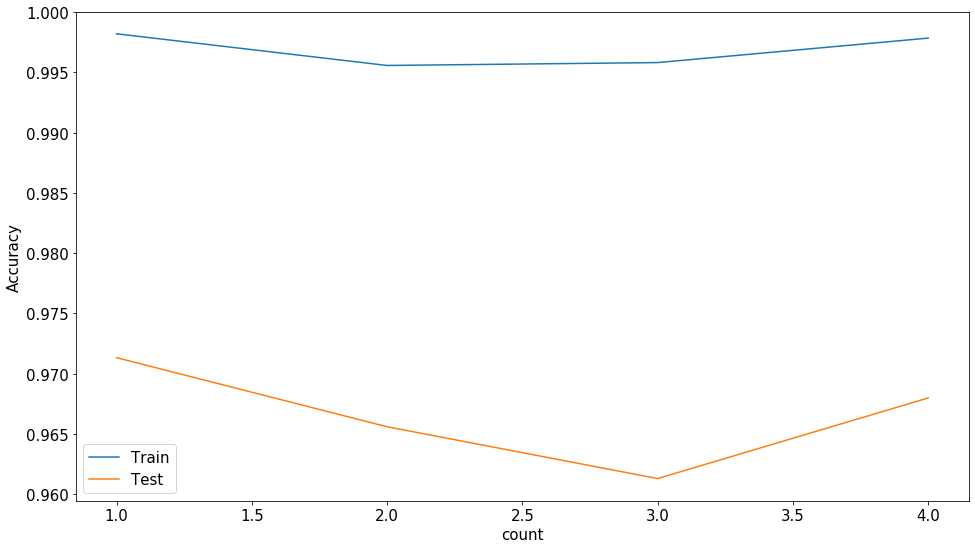

In [35]:
#인공신경망에서 최적의 은닉노드갯수를 결정하기 위한 실험
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,201,100): #첫번째 은닉층의 노드수 100~200
    for j in range(100,201,100): #두번째 은닉층의 노드수 100~200
        model=MLPClassifier(random_state=100,
                           hidden_layer_sizes=[i,j],max_iter=5000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))
        
plt.rcParams['font.size']=15
plt.plot(range(1,5),train_rate,label='Train')
plt.plot(range(1,5),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값
print('최적의 k:',idx+1)
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,201,100):
    for j in range(100,201,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

In [36]:
#첫번째 은닉층의 노드수 200개, 두번쨰 은닉층의 노드수 100개
ann=MLPClassifier(random_state=100,
                    hidden_layer_sizes=[200,100],max_iter=5000)
ann.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[200, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [37]:
score_tr=ann.score(X_train_scaled,y_train)
score_te=ann.score(X_test_scaled,y_test)
print(score_tr)
print(score_te)

0.9958173996175909
0.9612810707456979


In [38]:
#리스트에 추가
methods.append('ANN')
result_tr.append(score_tr)
result_te.append(score_te)
print(methods)
print(result_tr)
print(result_te)

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN']
[0.8978250478011472, 0.9175430210325047, 1.0, 1.0, 0.9958173996175909]
[0.888623326959847, 0.9086998087954111, 0.9799235181644359, 0.9397705544933078, 0.9612810707456979]


[1.00000000e-03 1.00000000e-04 6.15678776e-01]
최적의 c: 100
최적의 gamma: 0.1
최적의 정확도: 0.9665391969407265


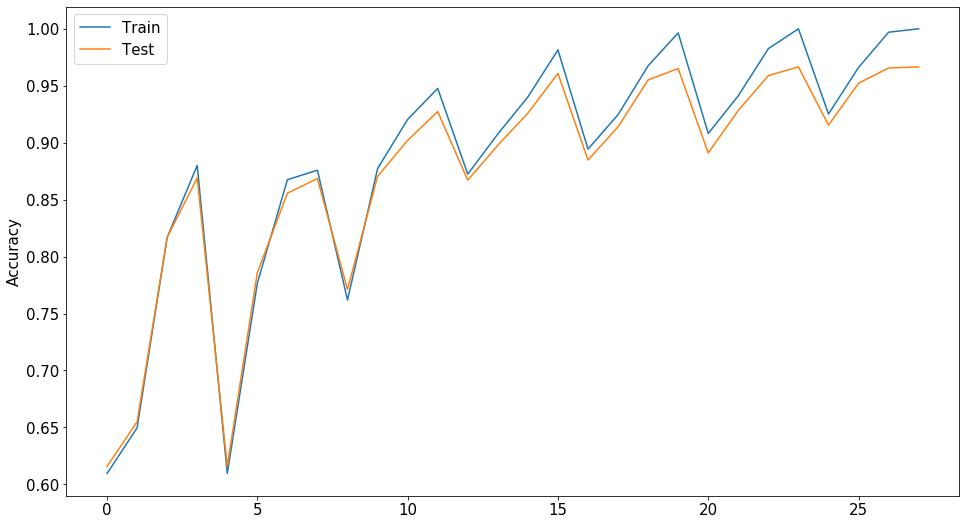

In [39]:
#svm 모형의 최적의 C,gamma value를 찾는 과정
from sklearn.svm import SVC
import numpy as np
train_rate=[]
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000]
g_values=[0.0001,0.001,0.01,0.1]
for n in c_values:
    for g in g_values:
        svm=SVC(C=n,gamma=g,random_state=10)#svm모형
        svm.fit(X_train_scaled,y_train)#학습
        train_rate.append([n,g,svm.score(X_train_scaled,y_train)])
        test_rate.append([n,g,svm.score(X_test_scaled,y_test)])
        
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2])
print(test_arr[idx])
idx=np.where(test_arr[:,2]==max_rate)[0][0]
print('최적의 c:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최적의 정확도:',test_rate[idx][2])

plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='Test')
plt.ylabel('Accuracy')
plt.legend()

In [43]:
print(train_arr)

[[1.00000000e-03 1.00000000e-04 6.09464627e-01]
 [1.00000000e-03 1.00000000e-03 6.49617591e-01]
 [1.00000000e-03 1.00000000e-02 8.16802103e-01]
 [1.00000000e-03 1.00000000e-01 8.80019120e-01]
 [1.00000000e-02 1.00000000e-04 6.09464627e-01]
 [1.00000000e-02 1.00000000e-03 7.76529637e-01]
 [1.00000000e-02 1.00000000e-02 8.67471319e-01]
 [1.00000000e-02 1.00000000e-01 8.75836520e-01]
 [1.00000000e-01 1.00000000e-04 7.61830784e-01]
 [1.00000000e-01 1.00000000e-03 8.77270554e-01]
 [1.00000000e-01 1.00000000e-02 9.20411090e-01]
 [1.00000000e-01 1.00000000e-01 9.47657744e-01]
 [1.00000000e+00 1.00000000e-04 8.72370937e-01]
 [1.00000000e+00 1.00000000e-03 9.07624283e-01]
 [1.00000000e+00 1.00000000e-02 9.40129063e-01]
 [1.00000000e+00 1.00000000e-01 9.81477055e-01]
 [1.00000000e+01 1.00000000e-04 8.94359465e-01]
 [1.00000000e+01 1.00000000e-03 9.24593690e-01]
 [1.00000000e+01 1.00000000e-02 9.67495220e-01]
 [1.00000000e+01 1.00000000e-01 9.96414914e-01]
 [1.00000000e+02 1.00000000e-04 9.081022

In [44]:
svm=SVC(C=100,gamma=0.1,random_state=10)#svm모형
svm.fit(X_train_scaled,y_train)#학습

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
score_tr=ann.score(X_train_scaled,y_train)
score_te=ann.score(X_test_scaled,y_test)
print(score_tr)
print(score_te)

0.9958173996175909
0.9612810707456979


In [ ]:
#리스트에 추가
methods.append('SVM')
result_tr.append(score_tr)
result_te.append(score_te)
print(methods)
print(result_tr)
print(result_te)

In [ ]:
#알고리즘별 예측정확도 그래프
#학습용 정확도
result_tr_arr=np.array(result_tr) #리스트를 넘파이배열로 변환
max_rate_tr=np.max(result_tr_arr) #최대값
idx_tr=np.where(result_tr_arr == max_rate_tr)[0][0] #최대값의 위치
#검증용 정확도
result_te_arr=np.array(result_te)
max_rate_te=np.max(result_te_arr)
idx_te=np.where(result_te_arr == max_rate_te)[0][0]

print('최적의 알고리즘(학습용):',methods[idx_tr])
print('최적의 정확도(학습용):',max_rate_tr)
print('최적의 알고리즘(검증용):',methods[idx_te])
print('최적의 정확도(검증용):',max_rate_te)

plt.rcParams['font.size']=15
plt.plot(methods,result_tr_arr,label='Train')
plt.plot(methods,result_te_arr,label='Test')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.legend()